In [3]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats

In [4]:
dataset = pd.read_csv("C:/Users/athar/Downloads/archive (2)/AB_NYC_2019.csv")
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
### Check data types of all columns
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
dataset.fillna({'reviews_per_month':0}, inplace=True)
dataset.fillna({'name':"NoName"}, inplace=True)
dataset.fillna({'host_name':"NoName"}, inplace=True)
dataset.fillna({'last_review':"NotReviewed"}, inplace=True)

In [8]:
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
dataset["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

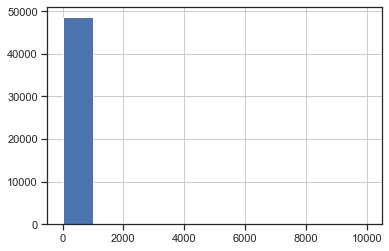

In [10]:
### See the distribution of price
hist_price=dataset["price"].hist()
### We observe that most listings have price less than $1000

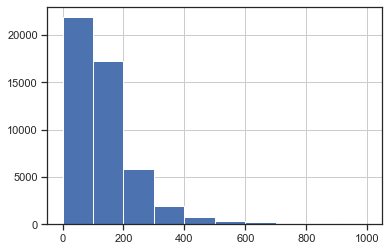

In [11]:
### Lets plot histogram for prices less than $2000
hist_price1=dataset["price"][dataset["price"]<1000].hist()
### This give a clearer picture!

In [12]:
dataset[dataset["price"]>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NotReviewed,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NotReviewed,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,NotReviewed,0.00,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NotReviewed,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NotReviewed,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NotReviewed,0.00,1,349


In [13]:
dataset=dataset[dataset["price"]<1000]

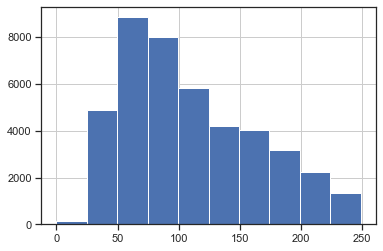

In [14]:
### We see a more Gaussian distribution here
hist_price2=dataset["price"][dataset["price"]<250].hist()

In [15]:
### We use 250 as threshold price 
dataset=dataset[dataset["price"]<250]

In [16]:
### Looking at the price column again
dataset["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [17]:
###There are 221 unique neighbourhoods in NYC as per this data set. Most listings are in Williamsburg
dataset['neighbourhood'].value_counts()

Bedford-Stuyvesant    3560
Williamsburg          3451
Harlem                2487
Bushwick              2404
Upper West Side       1570
                      ... 
New Dorp                 1
Neponsit                 1
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 219, dtype: int64

In [18]:
### Count how many neighbourhoods appear more than 200
dfnh =dataset.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)

In [19]:
### Most data is covered. 
len(dfnh["neighbourhood"])

36106

In [20]:
### Count how many neighbourhoods appear only once
dfnh =dataset.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() == 1)
len(dfnh["neighbourhood"])

5

In [21]:
###Lets look at neighbourhood groups
dataset['neighbourhood_group'].value_counts()

Brooklyn         18581
Manhattan        17270
Queens            5413
Bronx             1052
Staten Island      353
Name: neighbourhood_group, dtype: int64

In [22]:
### Lets see the average listing price by neighbourhood group
ng_price=dataset.groupby("neighbourhood_group")["price"].mean()

In [23]:
### Manhattan is most expensive and Bronx is the least expensive place to live
ng_price

neighbourhood_group
Bronx             73.796578
Brooklyn          98.068134
Manhattan        128.670990
Queens            83.639941
Staten Island     82.606232
Name: price, dtype: float64

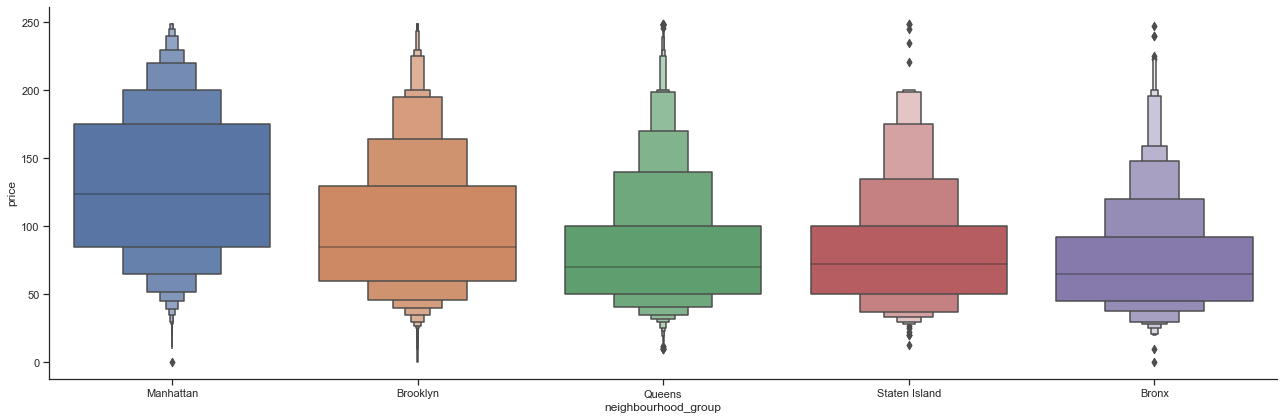

In [24]:
sns.catplot(y = 'price',x = 'neighbourhood_group',data = dataset.sort_values('price',ascending = False),
            kind = 'boxen',height = 6, aspect = 3)

In [25]:
### Checking if there are duplicate host_ids and whats is the maximum number of listings per host_id
df = dataset.groupby(["host_id"])
max(df.size())

238

In [26]:
## Here we can see that 32K host_ids are unique appearing only once whereas some host_ids appear as much as 238 times
df.size().value_counts().head()

1    28391
2     2993
3      844
4      302
5      151
dtype: int64

In [27]:
df.size().value_counts().tail()

43    1
34    1
19    1
16    1
25    1
dtype: int64

In [28]:
### Finding the host_id with maximum listings
host_id_counts = dataset["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

219517861

In [29]:
###We see that Sonder(NYC) has the max number of listings
dataset[dataset["host_id"]==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,2019-06-08,0.94,327,137
39772,30937595,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,2019-06-20,1.00,327,281
39773,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,2019-06-10,1.00,327,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47686,35869234,Sonder | 116 John | Classic 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70852,-74.00510,Entire home/apt,198,29,0,NotReviewed,0.00,327,345
47687,35869466,Sonder | 116 John | Classic Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70802,-74.00642,Entire home/apt,180,29,0,NotReviewed,0.00,327,338
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NotReviewed,0.00,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NotReviewed,0.00,327,342


In [30]:
dataset = dataset.drop(columns = ["id","host_name"])

In [31]:
### Let's Analyse the listing name column
dataset["name_length"]=dataset['name'].map(str).apply(len)

In [32]:
###Max and Min name length
print(dataset["name_length"].max())
print(dataset["name_length"].min())
print(dataset["name_length"].idxmax())
print(dataset["name_length"].idxmin())

179
1
25832
4033


In [33]:
### Max name 
dataset.at[25832, 'name']

'The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!'

In [34]:
###Min name
dataset.at[4033, 'name']

'/'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='name_length', ylabel='number_of_reviews'>

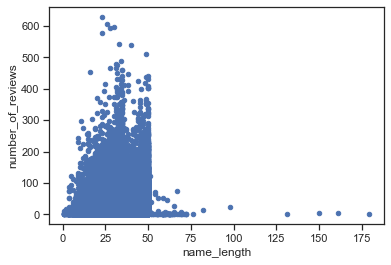

In [35]:
### Let's figure if name length has an impact on how much it is noticed. We can assume higher number of reviews mean more people lived there and hence more people "noticed" the listing
#dataset["name_length"].corr(dataset["number_of_reviews"])
dataset.plot.scatter(x="name_length", y ="number_of_reviews" )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='name_length'>

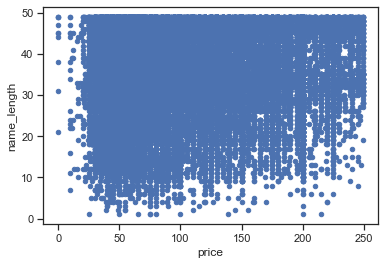

In [36]:
###There is hardly any relationship there. Lets try between price and name length 
dataset[dataset["name_length"]<50].plot.scatter(x="price", y ="name_length")
#dataset["name_length"].corr(dataset["price"])


<AxesSubplot:>

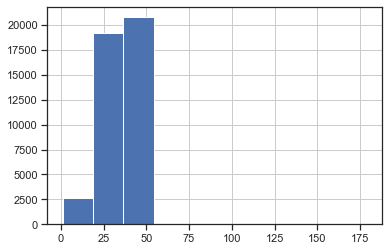

In [37]:
dataset.name_length.hist()

In [38]:
### Lets look at room_type variable
dataset['room_type'].value_counts()
### Most listings are either Entire home or Private room

Private room       21753
Entire home/apt    19790
Shared room         1126
Name: room_type, dtype: int64

In [39]:
rt_price = dataset.groupby("room_type")["price"].mean()

In [40]:
### Entire room has the highest price and shared room has lowest avg price which makes sense.
rt_price

room_type
Entire home/apt    144.977211
Private room        76.802832
Shared room         56.925400
Name: price, dtype: float64

In [41]:
### Analysing minimum nights

dataset["minimum_nights"].describe()

count    42669.000000
mean         6.856359
std         19.981924
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

<AxesSubplot:>

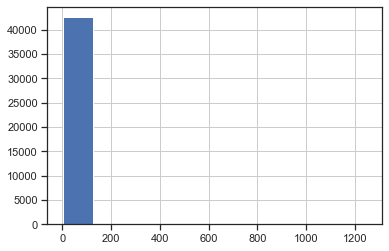

In [42]:
### Analysing minimum nights
### We see most values are between 1 to 100
hist_mn=dataset["minimum_nights"].hist()
hist_mn

<AxesSubplot:>

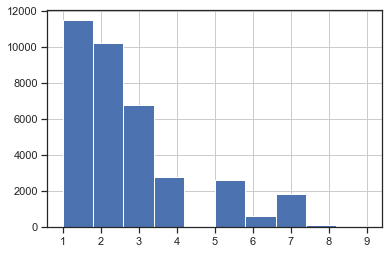

In [43]:
### Closer look
hist_mn1=dataset["minimum_nights"][dataset["minimum_nights"]<10].hist()
hist_mn1

In [44]:
dataset["minimum_nights"][dataset["minimum_nights"]>30]

6         45
14        90
36        60
81        31
106       90
        ... 
48312     90
48325     60
48368     60
48446    365
48752     32
Name: minimum_nights, Length: 628, dtype: int64

In [45]:
### We replace all records with min nights > 30 by 30
dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30

<AxesSubplot:>

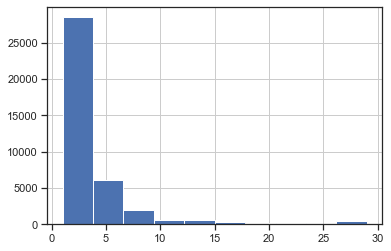

In [46]:
hist_mn2=dataset["minimum_nights"][dataset["minimum_nights"]<30].hist()
hist_mn2

In [47]:
### Does minimum_nights have impact on price?
dataset["minimum_nights"].corr(dataset["price"])

0.059554361719124614

In [48]:
###Finally lets analyse availability_365 column
dataset["availability_365"].describe()

count    42669.000000
mean       107.622747
std        129.731981
min          0.000000
25%          0.000000
50%         37.000000
75%        211.000000
max        365.000000
Name: availability_365, dtype: float64

<AxesSubplot:>

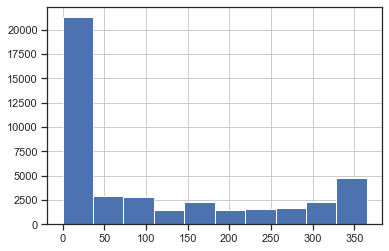

In [49]:
hist_av=dataset["availability_365"].hist()
hist_av

In [50]:
### After analysis, I have decided to drop these columns as they will not be useful in prediction
dataset.drop(["name",'last_review',"latitude",'longitude'], axis=1, inplace=True)

In [51]:
### Dropping host_id
dataset.drop(["host_id"], axis=1, inplace=True)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

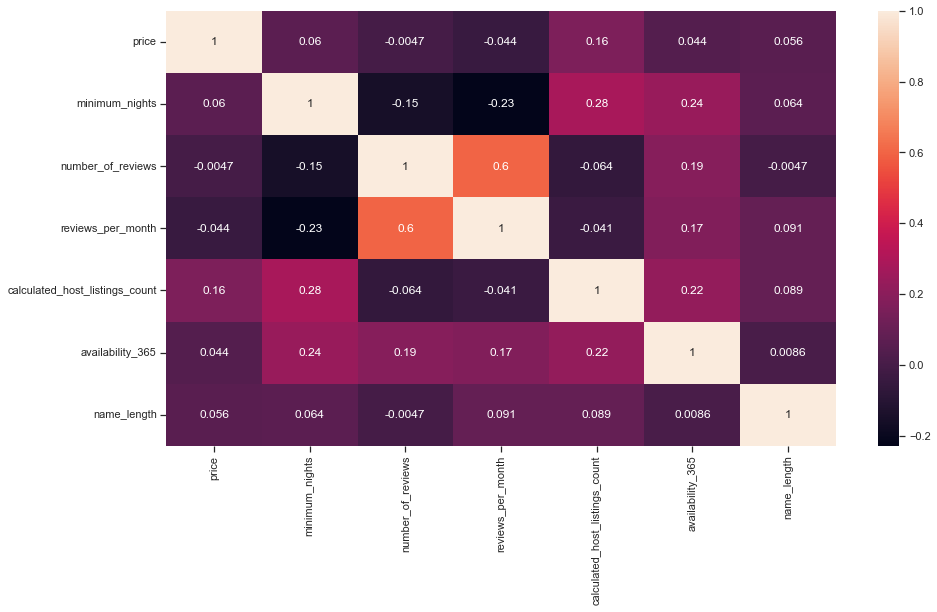

In [52]:
### Plotting correlation matrix 
corr = dataset.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

In [53]:
### Lets check out data one more time before beginning prediction. 
###Looks good!
dataset.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

In [54]:
## lets try without neighbourhood column

dataset_onehot1 = pd.get_dummies(dataset, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
dataset_onehot1.drop(["neighbourhood"], axis=1, inplace=True)

In [55]:
dataset_onehot1.shape

(42669, 13)

In [56]:
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']


In [57]:
Y1 = dataset_onehot1["price"]

In [58]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

In [59]:
### Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)

In [60]:
### R squared value
reg1.score(x_train1, y_train1)


0.5033306680968379

In [61]:
### Coefficients
reg1.coef_

array([-8.09520215e-01, -9.08803421e-03, -1.61641699e+00,  1.42434665e-01,
        4.67863558e-02,  1.98696542e-01,  1.98040033e+01,  4.41704660e+01,
        9.69056189e+00,  2.05907986e-01, -6.56442414e+01, -8.90902274e+01])

In [62]:
### Predicting 
y_pred1 = reg1.predict(x_test1)


In [63]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train1.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
11,rt_Shared room,-89.090227
10,rt_Private room,-65.644241
2,reviews_per_month,-1.616417
0,minimum_nights,-0.809520
1,number_of_reviews,-0.009088
4,availability_365,0.046786
3,calculated_host_listings_count,0.142435
5,name_length,0.198697
9,ng_Staten Island,0.205908
8,ng_Queens,9.690562


In [64]:
### Calculate RMSE
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1

37.68798547656789

In [65]:
### Taking a closer look at the estimates
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2882.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:            -1.7259e+05
No. Observations:               34135   AIC:                         3.452e+05
Df Residuals:                   34122   BIC:                         3.453e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\athar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
## No of reviews and ng_Staten Island is not significant and does not help our model much. Drop it
x_train1.drop(["number_of_reviews","ng_Staten Island"], axis=1,inplace=True)
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())
### Does not improve our model much

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3458.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:            -1.7259e+05
No. Observations:               34135   AIC:                         3.452e+05
Df Residuals:                   34124   BIC:                         3.453e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\athar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
dataset_onehot2 = pd.get_dummies(dataset,
                                 columns=['neighbourhood_group',"neighbourhood","room_type"], 
                                 prefix = ['ng',"nh","rt"],drop_first=False)

In [68]:
dataset_onehot2.shape


(42669, 234)

In [69]:
XL1= dataset_onehot2.loc[:, dataset_onehot2.columns != 'price']
YL1 = dataset_onehot2["price"]
x_trainL11, x_testL11, y_trainL11, y_testL11 = train_test_split(XL1, YL1, test_size=0.20, random_state=42)

In [70]:
regL1 = Lasso(alpha=0.01)
regL1.fit(x_trainL11, y_trainL11) 

Lasso(alpha=0.01)

In [71]:
### R squared
### This regularised model did way better than normal linear regression
regL1.score(x_trainL11, y_trainL11)

0.567273415079738

In [72]:
### RMSE
### Smaller value than earlier
y_predL1= regL1.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

35.12418778393195


In [73]:
### We can see that some parameters have zero coefficients.
regL1.coef_

array([-8.74425033e-01, -1.54751782e-02, -1.22179400e+00,  8.53002321e-02,
        5.35810896e-02,  1.32761316e-01, -7.28377764e+00,  6.02375904e+00,
        4.36500156e+01,  0.00000000e+00, -5.83296354e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  7.38167608e+00,
       -0.00000000e+00,  0.00000000e+00, -5.51564818e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.21248087e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.24682825e+00, -0.00000000e+00,  2.15137167e+01, -1.25526209e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.74065583e+00,
        2.93717277e+01, -4.39050540e+00, -0.00000000e+00, -1.34116345e+00,
        0.00000000e+00, -7.53429447e+00,  2.39726501e+01, -0.00000000e+00,
        0.00000000e+00,  1.25698946e+01, -6.67372887e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.77916675e+01,  

In [74]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=x_trainL11.columns
CoeffLS1["Coefficients"]=regL1.coef_
CoeffLS1.sort_values("Coefficients", ascending = False)

,Variable,Coefficients
230,rt_Entire home/apt,61.731482
8,ng_Manhattan,43.650016
214,nh_Vinegar Hill,32.470790
64,nh_DUMBO,32.420182
36,nh_Brooklyn Heights,29.371728
...,...,...
140,nh_Morningside Heights,-21.402528
232,rt_Shared room,-22.869801
104,nh_Harlem,-26.635484
216,nh_Washington Heights,-38.846419


In [75]:
### Initially, lets build a tree without any constraints.
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_trainL11, y_trainL11)


RandomForestRegressor(n_estimators=300)

In [76]:
### We get R squared value at 93.6%! There is obviously a problem of overfitting:(

print(regrRM.score(x_trainL11, y_trainL11))
y_predL1= regrRM.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

0.9360305880602783
34.896752596848316


In [77]:
### Using feature importance, we can see which feature had most weight
regrRM.feature_importances_

array([5.21886217e-02, 5.80779576e-02, 7.74456936e-02, 3.67891007e-02,
       7.27920100e-02, 8.43730908e-02, 8.40903828e-04, 3.76857373e-03,
       6.06948879e-02, 1.07404822e-03, 2.70606725e-04, 1.98826175e-04,
       1.24618320e-06, 9.39458592e-05, 2.65445693e-04, 1.24966469e-03,
       2.23674460e-05, 2.30227348e-04, 7.07126971e-04, 4.32847797e-05,
       1.71215825e-05, 3.93356031e-06, 2.08452276e-04, 7.58476425e-05,
       2.98151200e-03, 4.47319416e-04, 4.06992130e-05, 2.28628098e-04,
       2.23498480e-04, 1.32186859e-04, 8.01352712e-04, 3.51131050e-04,
       1.25865984e-04, 3.20840418e-04, 2.76793447e-04, 1.67284915e-05,
       1.48043486e-03, 1.54678997e-04, 7.90684467e-06, 2.33176036e-03,
       8.60697263e-05, 4.27236900e-04, 1.42414451e-03, 1.12659956e-05,
       7.22587223e-05, 2.57822272e-03, 9.77778596e-04, 5.50994102e-05,
       2.25693329e-04, 9.65586456e-05, 1.04888278e-05, 1.17118954e-04,
       1.95012180e-03, 1.34288017e-06, 4.89112744e-04, 4.81121376e-05,
      

In [78]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=x_trainL11.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
230,rt_Entire home/apt,4.115150e-01
5,name_length,8.437309e-02
2,reviews_per_month,7.744569e-02
4,availability_365,7.279201e-02
8,ng_Manhattan,6.069489e-02
...,...,...
80,nh_Eltingville,7.517565e-07
221,nh_Westerleigh,7.307758e-07
187,nh_Silver Lake,5.604074e-07
182,nh_Rossville,0.000000e+00


In [79]:
regrRM.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_trainL11, y_trainL11)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [81]:
### We get a smaller value for R squared
print(regrRM2.score(x_trainL11, y_trainL11))
y_predL1= regrRM2.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

0.797828746678048
34.41011330502461


In [82]:
CoeffRM2 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM2["Variable"]=x_trainL11.columns
CoeffRM2["FeatureImportance"]=regrRM2.feature_importances_
CoeffRM2.sort_values("FeatureImportance", ascending = False)


,Variable,FeatureImportance
230,rt_Entire home/apt,0.501173
8,ng_Manhattan,0.073974
4,availability_365,0.064922
2,reviews_per_month,0.062492
5,name_length,0.062305
...,...,...
130,nh_Manhattan Beach,0.000000
126,nh_Little Neck,0.000000
123,nh_Laurelton,0.000000
117,nh_Jamaica Hills,0.000000


In [83]:
### To find best values for the RF parameters, let us use cross validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400,num=2)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(100, 110, num = 1)]
max_depth.append(None)
min_samples_split = [2,10]
min_samples_leaf = [1, 2]
bootstrap = [True]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [84]:
print(rm_grid)

{'n_estimators': [200, 400], 'max_features': ['sqrt'], 'max_depth': [100, None], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [85]:
import time

In [86]:
# Use the random grid to search for best hyperparameters
t1 = time.time()
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 90, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(x_trainL11, y_trainL11)
t2 =time.time()

Fitting 2 folds for each of 16 candidates, totalling 32 fits


C:\Users\athar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=90. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [87]:
### Time taken
(t2-t1)/60

3.3407491485277814

In [88]:
### Here we can see Best parameters for the best model
rf2_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [89]:
### Final R squared value
rf2_random.score(x_trainL11, y_trainL11)

0.7815584186804732

In [90]:
### We finally have the least RMSE among all model!
y_predL1= rf2_random.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

33.85957875352338


In [91]:
### Finally lets compare all models
### Including models from my previous project with pyspark
rmsedt = {"Model":["RF1_Sprk","RF2_Sprk","RF3_Sprk","LR","L1","RFR"],"RMSE":[71.55745125705758,65.7207885074504
,62.51297007998151,37.68939882420686,35.12428625156702,34.05098593042094]}
rmsedf = pd.DataFrame(rmsedt)
rsqdt = {"Model":["LR","L1","RFR"],"RSquared":[50.3,56.7,77.8]}
rsqdt = pd.DataFrame(rsqdt)

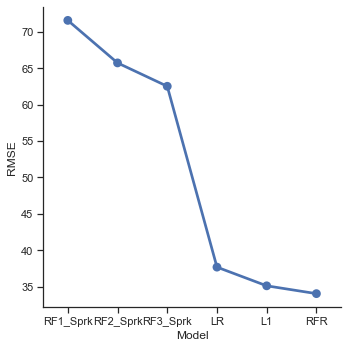

In [92]:
sns.catplot(x="Model", y="RMSE", linestyles=["-"],
            kind="point", data=rmsedf);

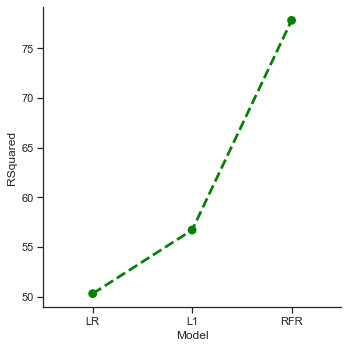

In [93]:
sns.catplot(x="Model", y="RSquared", linestyles=["--"], color ="green", kind="point", data=rsqdt);

In [94]:
XL1.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length',
       'ng_Bronx', 'ng_Brooklyn', 'ng_Manhattan', 'ng_Queens',
       ...
       'nh_Williamsbridge', 'nh_Williamsburg', 'nh_Willowbrook',
       'nh_Windsor Terrace', 'nh_Woodhaven', 'nh_Woodlawn', 'nh_Woodside',
       'rt_Entire home/apt', 'rt_Private room', 'rt_Shared room'],
      dtype='object', length=233)

In [95]:
def predict_price(neighbourhood_grp, neighbourhood, room_type, min_nights, no_of_reviews, 
                  reviews_per_month, host_count, availability_365, name_length):
    ng_index = np.where(XL1.columns==neighbourhood_grp)[0][0]
    nh_index = np.where(XL1.columns==neighbourhood)[0][0]
    rt_index = np.where(XL1.columns==room_type)[0][0]
    
    x=np.zeros(len(XL1.columns))
    x[0]=min_nights
    x[1]=no_of_reviews
    x[2]=reviews_per_month
    x[3]=host_count
    x[4]=availability_365
    x[5]=name_length
    
    if ng_index>=0:
        x[ng_index]=1
    if nh_index>=0:
        x[nh_index]=1 
    if rt_index>=0:
        x[rt_index]=1
        
    return rf2_random.predict([x])[0]

In [96]:
predict_price('ng_Manhattan','nh_Williamsburg','rt_Private room',2,4,50,100,365,5)

C:\Users\athar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


120.08135819526413

In [97]:
predict_price('ng_Staten Island','nh_Williamsburg','rt_Private room',2,4,50,100,365,5)

C:\Users\athar\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


89.02704909571634

In [98]:
import pickle
with open('Airbnb_NYC_Price_Prediction.pickle','wb') as f:
    pickle.dump(rf2_random,f)

In [99]:
import json
columns={
    'data_columns':[col.lower() for col in XL1.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))